# Pymaceuticals Inc.
---

### Analysis

- Add your analysis here.
 

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single DataFrame
mouse_results_df = pd.merge(mouse_metadata, study_results, on="Mouse ID")

# Display the data table for preview
mouse_results_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [2]:
# Checking the number of mice.
mice_count_initial = len(mouse_metadata["Mouse ID"].unique())
print(f'Number of mice: {mice_count_initial}')

Number of mice: 249


In [3]:
# Our data should be uniquely identified by Mouse ID and Timepoint
# Get the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Identify all rows where Mouse ID and Timepoint indicate a duplicate
dups_boolean = pd.DataFrame(mouse_results_df.duplicated(["Mouse ID", "Timepoint"], keep=False))

# Name the column identifying duplicates to merge with mouse_results_df and merge on index
dups_boolean_renamed = dups_boolean.rename(columns={0:"Duplicate"})
mouse_dups = pd.merge(mouse_results_df, dups_boolean_renamed, left_index=True, right_index=True)

# Identify and print unique Mouse IDs identified as duplicates
duplicates = mouse_dups.loc[mouse_dups["Duplicate"]==True]
print(f'Specimens with the following ID(s) contain duplicate entries: {duplicates["Mouse ID"].unique()}')

Specimens with the following ID(s) contain duplicate entries: ['g989']


In [4]:
# Optional: Get all the data for the duplicate mouse ID. 
mouse_results_df.loc[mouse_results_df["Mouse ID"]=='g989']

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.000000,0
909,g989,Propriva,Female,21,26,0,45.000000,0
910,g989,Propriva,Female,21,26,5,48.786801,0
911,g989,Propriva,Female,21,26,5,47.570392,0
912,g989,Propriva,Female,21,26,10,51.745156,0
913,g989,Propriva,Female,21,26,10,49.880528,0
914,g989,Propriva,Female,21,26,15,51.325852,1
915,g989,Propriva,Female,21,26,15,53.442020,0
916,g989,Propriva,Female,21,26,20,55.326122,1
917,g989,Propriva,Female,21,26,20,54.657650,1


In [5]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
mouse_results_clean = mouse_results_df.loc[mouse_results_df["Mouse ID"]!='g989']

In [6]:
# Checking the number of mice in the clean DataFrame.
mice_count_clean = len(mouse_results_clean["Mouse ID"].unique())
print(f'After removing duplicate(s), number of mice included in analysis: {mice_count_clean}')
print(f'(number of duplicates removed: {mice_count_initial-mice_count_clean})')

After removing duplicate(s), number of mice included in analysis: 248
(number of duplicates removed: 1)


## Summary Statistics

In [7]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume. 
mouse_results_grouped = mouse_results_clean.groupby("Drug Regimen")
tumor_mean_grouped = mouse_results_grouped["Tumor Volume (mm3)"].mean()
tumor_median_grouped = mouse_results_grouped["Tumor Volume (mm3)"].median()
tumor_variance_grouped = mouse_results_grouped["Tumor Volume (mm3)"].var()
tumor_stdev_grouped = mouse_results_grouped["Tumor Volume (mm3)"].std()
tumor_sem_grouped = mouse_results_grouped["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary DataFrame.
tumor_summary_grouped = pd.DataFrame({"Mean":tumor_mean_grouped, "Median":tumor_median_grouped,
                                     "Variance":tumor_variance_grouped, "Standard Dev":tumor_stdev_grouped,
                                     "SEM":tumor_sem_grouped})

print("Summary Statistics of Tumor Volume by Drug Regimen")
tumor_summary_grouped

Summary Statistics of Tumor Volume by Drug Regimen


,Mean,Median,Variance,Standard Dev,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

<Axes: title={'center': 'Total Observations by Drug Regimen'}, xlabel='Drug Regimen', ylabel='# of observations'>

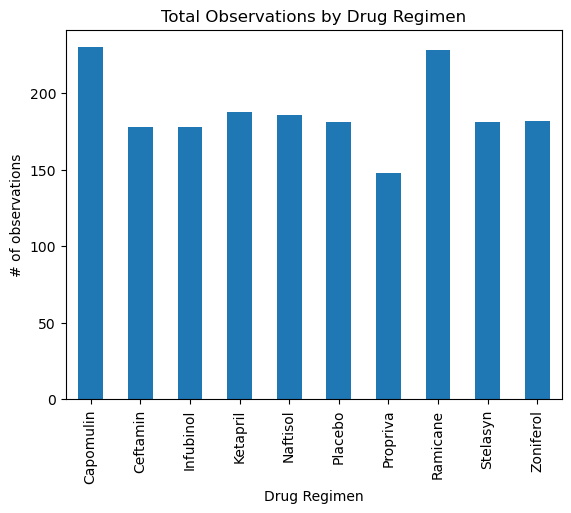

In [29]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using Pandas.
timepoints_grouped = pd.DataFrame(mouse_results_grouped["Timepoint"].count())
timepoints_grouped.plot.bar(y="Timepoint", legend=False, ylabel="# of observations", title="Total Observations by Drug Regimen")

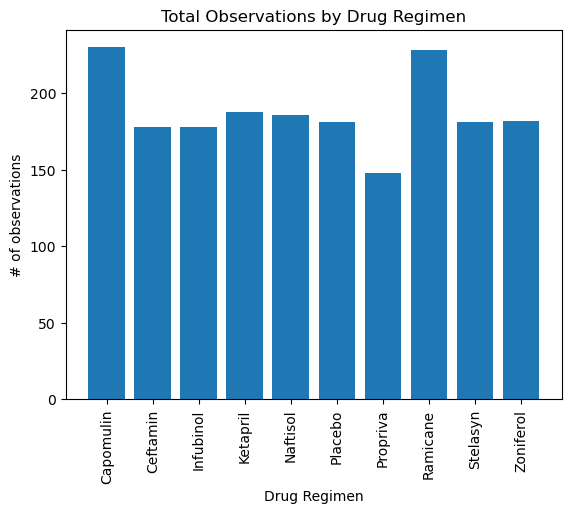

In [27]:
# Generate a bar plot showing the total number of rows (Mouse ID/Timepoints) for each drug regimen using pyplot.
regimens = list(tumor_summary_grouped.index)
counts = list(timepoints_grouped["Timepoint"])

x_axis = np.arange(len(regimens))

plt.bar(regimens, counts)
plt.xticks(rotation="vertical")
plt.title("Total Observations by Drug Regimen")
plt.xlabel("Drug Regimen")
plt.ylabel("# of observations")
plt.show()

In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using Pandas


In [ ]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


## Quartiles, Outliers and Boxplots

In [ ]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse


# Merge this group df with the original DataFrame to get the tumor volume at the last timepoint


In [ ]:
# Put treatments into a list for for loop (and later for plot labels)


# Create empty list to fill with tumor vol data (for plotting)


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

    
    # Locate the rows which contain mice on each drug and get the tumor volumes

    
    # add subset 

    
    # Determine outliers using upper and lower bounds


In [ ]:
# Generate a box plot that shows the distrubution of the tumor volume for each treatment group.


## Line and Scatter Plots

In [ ]:
# Generate a line plot of tumor volume vs. time point for a single mouse treated with Capomulin


In [ ]:
# Generate a scatter plot of mouse weight vs. the average observed tumor volume for the entire Capomulin regimen


## Correlation and Regression

In [ ]:
# Calculate the correlation coefficient and a linear regression model 
# for mouse weight and average observed tumor volume for the entire Capomulin regimen
